> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a TMDb_ Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Overview:
I am doing  Data Analysis Project on A movie Data. Lets fnd out which genre is the most popular and which movie has the highest revenue as the most important questions. I have taken a dataset named TMDb(The Movie Database) for analysis purpose.
This Dataset consists of numerous data from the past. It has Columns such as:Id, date of release, revenue, genre, cast etc.

#### Questions To Answer:
1. Movies which had most and least profit
2. Movies with highest and lowest Budget
3. Movies with  highest and lowest Revenue
4. Average runtime of the movies


With Respect to profitable Movies
1. Most Successful Genres
2. Most frequent cast
3. Average budget
4. Average revenue
5. Average runtime


In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


import numpy as np
import pandas as pd
import csv
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

After going through the dataset, it is clear that some of the columns can be removed, so that the data becomes easy to understand and interpret. So, further we can delete the unused columns.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#storing the csv file data into a variable tmdb_data
tmdb_data = pd.read_csv('tmdb-movies.csv')
#
tmdb_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Observations:
1. As nothing about the currency is mentioned, so, i will take dollar as the unit.

### Data Cleaning (Removing of unused data)

### Observations:
1.We need to remove unused column such as id, imdb_id, vote_count, production_company, keywords etc.Removing the duplicacy in the rows(if any).
2.Some movies in the database have zero budget or zero revenue, that is there value has not been recorded so we will be discarding such entries
3.Changing release date column into date format.
4.Replacing zero with NAN in runtime column.
5.Changing format of budget and revenue column.



### Removing Columns:
Columns that we need to delete are - id, imdb_id, popularity, budget_adj, revenue_adj, keywords, overview, production_companies, vote_count and vote_average.

In [4]:
dlt_col =['id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

tmdb_data = tmdb_data.drop(dlt_col,1)
tmdb_data.head()


,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


#### 2. Removing duplicacy in the data:
 First we will see how many entries are there in total then remove the duplicate ones.
 


In [5]:
rows, col = tmdb_data.shape

print('Total entries of movies= {} , no. of columns= {}'.format(rows-1, col))

Total entries of movies= 10865 , no. of columns= 10


In [6]:
#removing duplicates
tmdb_data.drop_duplicates(keep ='first', inplace=True)
rows, col = tmdb_data.shape

print('Total entries of movies= {} , no. of columns= {}'.format(rows-1, col))

Total entries of movies= 10864 , no. of columns= 10


One duplicate row removed! 

### 3. Removing 0's from Budget and the revenue columns


In [7]:

temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
tmdb_data[temp_list] = tmdb_data[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
tmdb_data.dropna(subset = temp_list, inplace = True)

rows, col = tmdb_data.shape
print('So after removing NAN entries, we now have only {} no.of movies.'.format(rows-1))

So after removing NAN entries, we now have only 3853 no.of movies.


#### 4.Changing the release date into standard Date format


In [8]:

tmdb_data.release_date = pd.to_datetime(tmdb_data['release_date'])

In [9]:
tmdb_data.head(4)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015


In [10]:
tmdb_data['runtime'] = tmdb_data['runtime'].replace(0,np.NAN)

#### Changing the format of  budget and revenue Column

In [11]:
#present datatype:
tmdb_data.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [12]:
new_type=['budget','revenue']
tmdb_data[new_type]=tmdb_data[new_type].applymap(np.int64)
tmdb_data.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis



### 1. Calculating the profit of the movie

In [28]:
#insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)
tmdb_data.insert(2,'profit_earned',tmdb_data['revenue']-tmdb_data['budget'])
tmdb_data.head(3)

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


### Research Question 1:  (Movies which had most and least profit)

In [29]:
import pprint
#define function
def calculate(column):
    #for highest earned profit
    high= tmdb_data[column].idxmax()
    high_details=pd.DataFrame(tmdb_data.loc[high])
    
    #for lowest earned profit
    low= tmdb_data[column].idxmin()
    low_details=pd.DataFrame(tmdb_data.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('profit_earned')


,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


The above data shows that column 1386 has the highest earned profit=2544505847
and column with 2244 has the least profit = -413912431


### Research Question 2:  Movies with the largest and lowest budgets

In [30]:
calculate('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
profit_earned,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


the column with id: 2244 has the highest budget 425000000 dollar
the column with id:2618 has the least budget 1 dollar

### Research Question 3: Movies with highest and lowest revenue:

In [31]:
calculate('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profit_earned,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


Column with id 1386 shows the largest revenue earned i.e 2781505847 dollar.

Whereas the column with id 5067 shows the smallest revenue earned i.e 2 dollar

### Research Question 4:  Average runtime of the movies

In [32]:
def avg_fun(column):
    return tmdb_data[column].mean()

In [33]:
avg_fun('runtime')

109.22029060716139

So, the average runtime = 109 minutes.

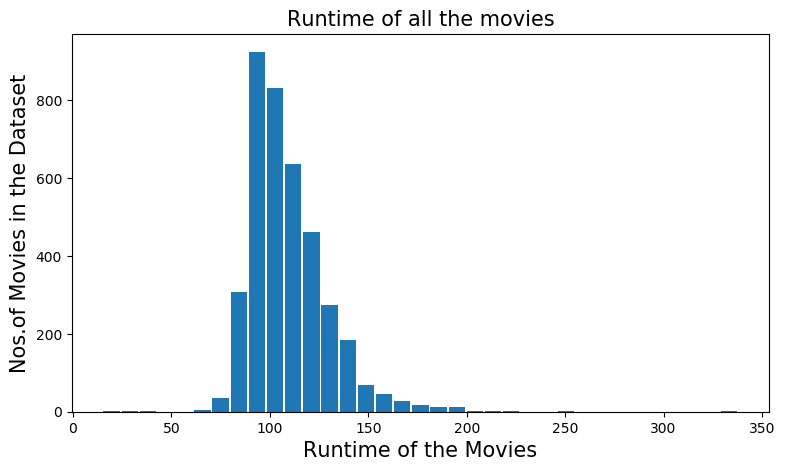

In [34]:

#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(tmdb_data['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

The distribution of the above formed graph is positively skewed or right skewed! Most of the movies are timed between 80 to 115 minutes. Almost 1000 and more no.of movies fall in this criteria.

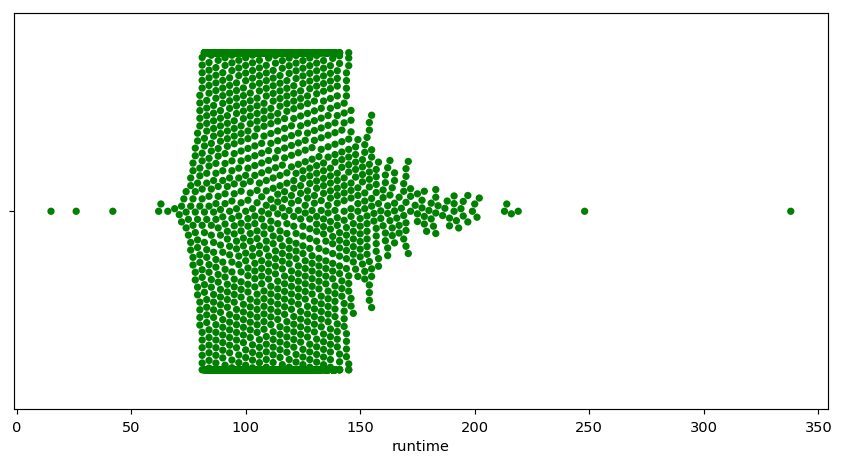

In [43]:
#The Second plots is the data points plot of runtime of movies
import seaborn as sns
plt.figure(figsize=(10,5), dpi = 105)
#using seaborn to generate the plot
sns.swarmplot(tmdb_data['runtime'], color = 'green')
#displaying the plot
plt.show()

In [50]:
tmdb_data['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

 The plot generated above give a visual of complete distribution of runtime of movies by plotting the points against their respective position in the ditribution



By looking at  the plot and calculations, we can conclude that..

25% of movies have a runtime of less than 95 minutes
50% of movies have a runtime of less than 109 minutes. (median)
75% of movies have a runtime of less than 119 minutes

#### With respect to the profitable Movies:


we need to fix a significant amount of profit, so, we do this by cleaning our data and fix this amount to be 50 million dollars.

In [56]:
profit_data = tmdb_data[tmdb_data['profit_earned'] >= 50000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#printing the changed dataset
profit_data.head(3)

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


In [57]:
#counting the no.of rows in the new data base
len(profit_data)

1338


So our dataset is reduced to 1338 from 3853.

### Research Question 6: Most Successful Genres 

In [58]:
#function which will take any column as argument from and keep its track 
def data(column):
    #will take a column, and separate the string by '|'
    data = profit_data[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [59]:
#variable to store the retured value
count = data('genres')
#printing top 5 values
count.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

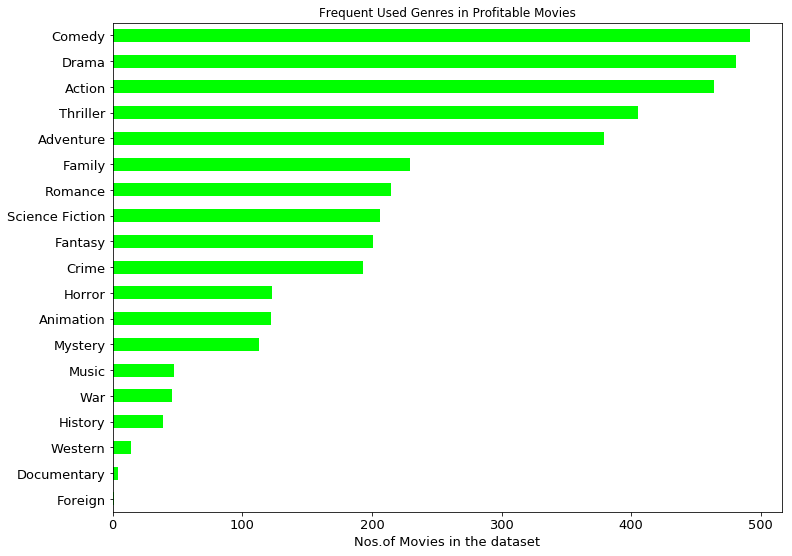

In [60]:
#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.barh(color = '#00FF00', fontsize = 13)

#title
lt.set(title = 'Frequent Used Genres in Profitable Movies')

# on x axis
lt.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

### Research Question 7: most frequent Cast:

In [61]:
count = data('cast')
#printing top 5 values
count.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

Tom Cruise is at the top with 27 casts and Brad Pitt at second with 25 casts.

In [52]:
def profit_avg(column):
    return profit_data[column].mean()

In [64]:
profit_avg('budget')

60444957.760837071

The movies having profit of 50 million dollar or more have an average budget of 60 million dollars.

In [65]:
profit_avg('revenue')

254957662.59491777

The movies having profit of 50 million dollars or more have an average revenue of 255 million dollars.

In [66]:
profit_avg('runtime')

113.66741405082212

The movies having profit of 50 million dollars or more have an average runtime of 113 minutes.

<a id='conclusions'></a>
## Conclusions:
From this analysis, we can conclude the following:

For a Movie to be in successful criteria

1.Average Budget must be around 60 millon dollar
2.Average duration of the movie must be 113 minutes
3.Any one of these should be in the cast :Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone,Cameron Diaz
4.Genre must be : Action, Adventure, Thriller, Comedy, Drama.


This was a very interesting dataset to analyse. One can easily see and say that for a movie to be successful or to earn 50 million dollars the above conditions must be satisfied.

In [68]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0